In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dask.dataframe as dd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# **Data Undestanding**

In [ ]:
# df_train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
# df_test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

# df_train

In [ ]:
# read file csv
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')


In [ ]:
df_test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


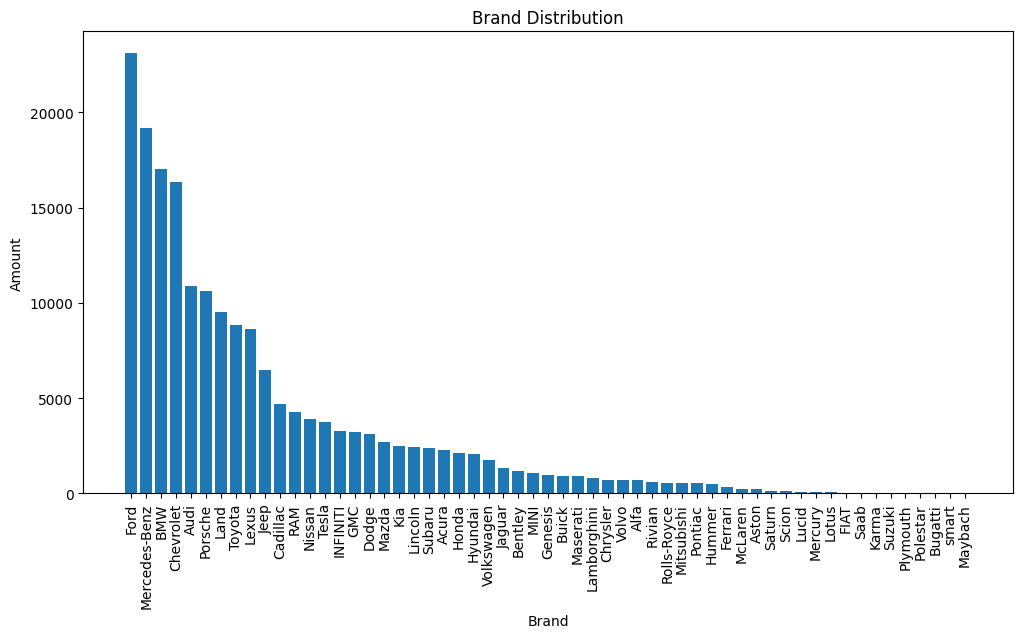

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

In [ ]:
# Count the number of occurrences of each brand
brand_counts = df_train['brand'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(brand_counts.index, brand_counts.values) # Use plt.bar for histograms
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Amount')
plt.xticks(rotation=90)

plt.show()

print(brand_counts)

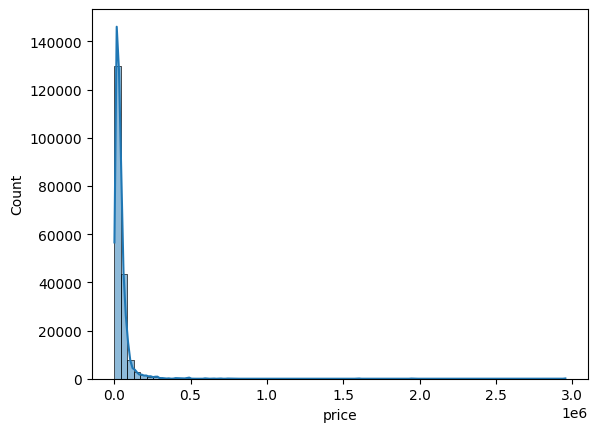

In [ ]:
sns.histplot(df_train['price'], bins=70, kde=True)
plt.show()

In [ ]:
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


# **Preprocessing**

In [ ]:
# Check for missing values
missing_values_train = df_train.isnull().sum()
print("Missing values in training data:\n", missing_values_train)

missing_values_test = df_test.isnull().sum()
print("\nMissing values in test data:\n", missing_values_test)

Missing values in training data:
 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

Missing values in test data:
 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


In [ ]:
# Handling missing values with median for numerical and mode for categorical features
for col in ['fuel_type', 'accident', 'clean_title']:
    if df_train[col].dtype == 'object' or df_train[col].dtype == 'category':
        mode_value = df_train[col].mode()[0]
        df_train[col].fillna(mode_value, inplace=True)
        if col in df_test.columns:
            df_test[col].fillna(mode_value, inplace=True)
    else:
        median_value = df_train[col].median()
        df_train[col].fillna(median_value, inplace=True)
        if col in df_test.columns:
            df_test[col].fillna(median_value, inplace=True)

print("Missing values in training data after handling:\n", df_train.isnull().sum())
print("\nMissing values in test data after handling:\n", df_test.isnull().sum())

Missing values in training data after handling:
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

Missing values in test data after handling:
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


/tmp/ipython-input-387536887.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-387536887.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# # Data Cleaning
# df_train.dropna(inplace=True)
# df_test.dropna(inplace=True)

# print("The amount of training data after removing missing values:", len(df_train))
# print("The amount of testing data after removing missing values:", len(df_test))


In [ ]:
# check for duplicate data
print(f"Train data : {df_train.duplicated().sum()}")
print(f" Test data : {df_test.duplicated().sum()}")

Train data : 0
 Test data : 0


In [ ]:
categorical_features = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col']
binary_features = ['accident', 'clean_title']

# Label Encoding for binary features
for feature in binary_features:
    le = LabelEncoder()
    df_train[feature + '_encoded'] = le.fit_transform(df_train[feature].fillna('None reported'))
    df_test[feature + '_encoded'] = le.transform(df_test[feature].fillna('None reported'))

def split_engine(df):
    df['horsepower'] = df['engine'].str.extract(r'(\d+)HP').astype(float)
    df['engine_size'] = df['engine'].str.extract(r'(\d\.\d+)L').astype(float)
    return df

df_train = split_engine(df_train)
df_test = split_engine(df_test)

# Drop columns that are not needed
df_train = df_train.drop(columns=['engine'])
df_test = df_test.drop(columns=['engine'])

In [ ]:
numerical_features = ['model_year', 'milage', 'horsepower', 'engine_size',
                      'accident_encoded', 'clean_title_encoded']

# Handle missing values and data type optimization
df_train[numerical_features] = df_train[numerical_features].fillna(0).astype('float32')
df_test[numerical_features] = df_test[numerical_features].fillna(0).astype('float32')

# Column verification before preprocessing
print("\nColumns in df_train before preprocessing:")
print(df_train.columns.tolist())

print("\nColumns in df_test before preprocessing:")
print(df_test.columns.tolist())



Columns in df_train before preprocessing:
['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'accident_encoded', 'clean_title_encoded', 'horsepower', 'engine_size']

Columns in df_test before preprocessing:
['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'accident_encoded', 'clean_title_encoded', 'horsepower', 'engine_size']


In [ ]:
# Define preprocessor with OneHotEncoder to produce dense output
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='drop'
)

# **Model**
In this project the model that will be used is
1. Linier Regression
2. Decision Tree Regression

**LINIER REGRESSION**

In [ ]:
# Pipeline for Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
X = df_train.drop(columns=['price'])
y = df_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verify the columns to be used in the preprocessor
missing_cols_train = [col for col in categorical_features + numerical_features if col not in X_train.columns]
missing_cols_test = [col for col in categorical_features + numerical_features if col not in df_test.columns]

if missing_cols_train:
    print(f"\nMissing columns in data train: {missing_cols_train}")
else:
    print("\nAll categorical and numeric columns are present in data train.")

if missing_cols_test:
    print(f"\nMissing columns in data test: {missing_cols_test}")
else:
    print("\nAll categorical and numeric columns are present in data test.")


All categorical and numeric columns are present in data train.

All categorical and numeric columns are present in data test.


In [ ]:
# Make sure there are no missing columns before continuing
assert not missing_cols_train, f"The following columns are missing in train data: {missing_cols_train}"
assert not missing_cols_test, f"The following columns are missing in test data: {missing_cols_test}"

In [ ]:
# Train the model
print("\nTraining a Linear Regression model...")
pipeline.fit(X_train, y_train)

# Predict validation set
y_pred = pipeline.predict(X_val)


Training a Linear Regression model...


In [ ]:
# Evaluate model
mse1 = mean_squared_error(y_val, y_pred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_val, y_pred)

print(f"\nModel Evaluation on Validation Set of Linear Regression:")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")
print(f"R^2 Score: {r2_1}")


Model Evaluation on Validation Set of Linear Regression:
MSE: 4792574317.748773
RMSE: 69228.4213148673
R^2 Score: 0.1382022573530136


In [ ]:
print("\nTraining a Linear Regression model on the entire train data...")
pipeline.fit(X, y)


Training a Linear Regression model on the entire train data...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['brand', 'model',
                                                   'fuel_type', 'transmission',
                                                   'ext_col', 'int_col']),
                                                 ('num', StandardScaler(),
                                                  ['model_year', 'milage',
                                                   'horsepower', 'engine_size',
                                                   'accident_encoded',
                                                   'clean_title_encoded'])])),
                ('regressor', LinearRegression())])

In [ ]:
print("\nMaking predictions on test data...")
y_test_pred = pipeline.predict(df_test)

df_test['Predicted Price'] = y_test_pred


Making predictions on test data...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


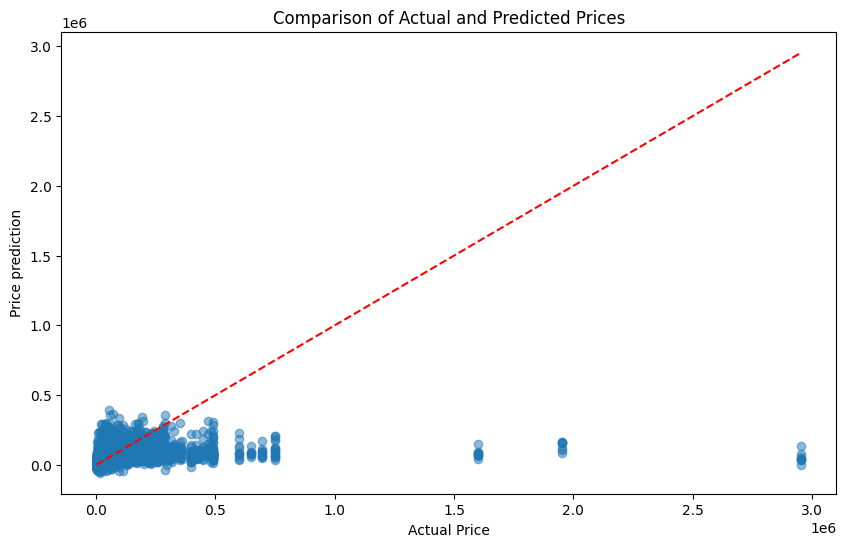

In [ ]:
# Price prediction visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Price prediction")
plt.title("Comparison of Actual and Predicted Prices")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()

**DECISION TREE REGRESSION**

In [ ]:
# Pipeline for Decision Tree Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [ ]:
X = df_train.drop(columns=['price'])
y = df_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verify the columns to be used in the preprocessor
missing_cols_train = [col for col in categorical_features + numerical_features if col not in X_train.columns]
missing_cols_test = [col for col in categorical_features + numerical_features if col not in df_test.columns]

if missing_cols_train:
    print(f"\nMissing columns in data train: {missing_cols_train}")
else:
    print("\nAll categorical and numeric columns are present in data train.")

if missing_cols_test:
    print(f"\nMissing columns in data test: {missing_cols_test}")
else:
    print("\nAll categorical and numeric columns are present in data test.")



All categorical and numeric columns are present in data train.

All categorical and numeric columns are present in data test.


In [ ]:
# Make sure there are no missing columns before continuing
assert not missing_cols_train, f"The following columns are missing in train data: {missing_cols_train}"
assert not missing_cols_test, f"The following columns are missing in test data: {missing_cols_test}"

In [ ]:
# Train the model
print("\nTraining a Decision Tree Regressor model...")
pipeline.fit(X_train, y_train)


Training a Decision Tree Regressor model...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['brand', 'model',
                                                   'fuel_type', 'transmission',
                                                   'ext_col', 'int_col']),
                                                 ('num', StandardScaler(),
                                                  ['model_year', 'milage',
                                                   'horsepower', 'engine_size',
                                                   'accident_encoded',
                                                   'clean_title_encoded'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_val)

In [ ]:
mse2 = mean_squared_error(y_val, y_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_val, y_pred)

print(f"\nModel Evaluation on Validation Set of Linear Regression:")
print(f"MSE: {mse2}")
print(f"RMSE: {rmse2}")
print(f"R^2 Score: {r2_2}")


Model Evaluation on Validation Set of Linear Regression:
MSE: 9939046603.852606
RMSE: 99694.76718390292
R^2 Score: -0.7872331985634893


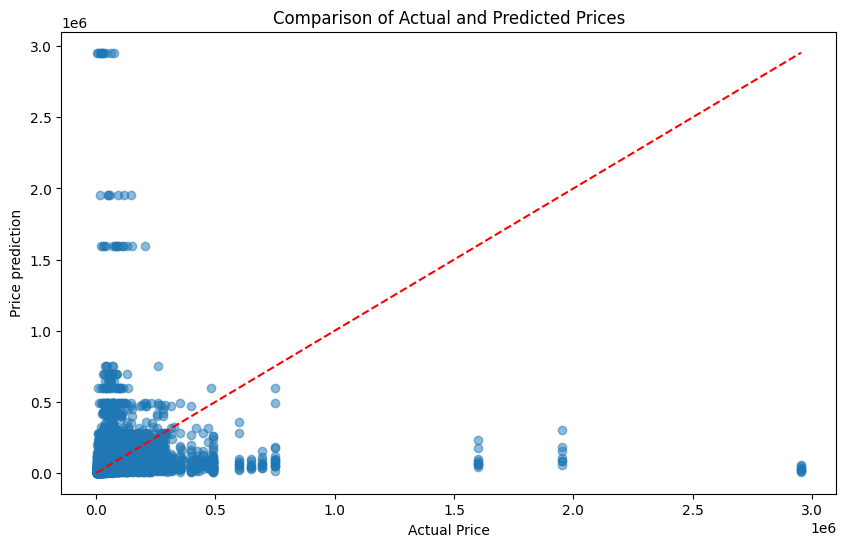

In [ ]:
# Price prediction visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Price prediction")
plt.title("Comparison of Actual and Predicted Prices")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()

**RANDOM FOREST**

In [ ]:
# Pipeline untuk Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
X = df_train.drop(columns=['price'])
y = df_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verify the columns to be used in the preprocessor
missing_cols_train = [col for col in categorical_features + numerical_features if col not in X_train.columns]
missing_cols_test = [col for col in categorical_features + numerical_features if col not in df_test.columns]

if missing_cols_train:
    print(f"\nMissing columns in data train: {missing_cols_train}")
else:
    print("\nAll categorical and numeric columns are present in data train.")

if missing_cols_test:
    print(f"\nMissing columns in data test: {missing_cols_test}")
else:
    print("\nAll categorical and numeric columns are present in data test.")



All categorical and numeric columns are present in data train.

All categorical and numeric columns are present in data test.


In [ ]:
# Make sure there are no missing columns before continuing
assert not missing_cols_train, f"The following columns are missing in train data: {missing_cols_train}"
assert not missing_cols_test, f"The following columns are missing in test data: {missing_cols_test}"

In [ ]:
# # Train the model
# print("\nTraining a Random Forest model...")
# pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_val)

In [ ]:
mse3 = mean_squared_error(y_val, y_pred)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_val, y_pred)

print(f"\nModel Evaluation on Validation Set of Linear Regression:")
print(f"MSE: {mse3}")
print(f"RMSE: {rmse3}")
print(f"R^2 Score: {r2_3}")



Model Evaluation on Validation Set of Linear Regression:
MSE: 9939046603.852606
RMSE: 99694.76718390292
R^2 Score: -0.7872331985634893


# **Conclusion**

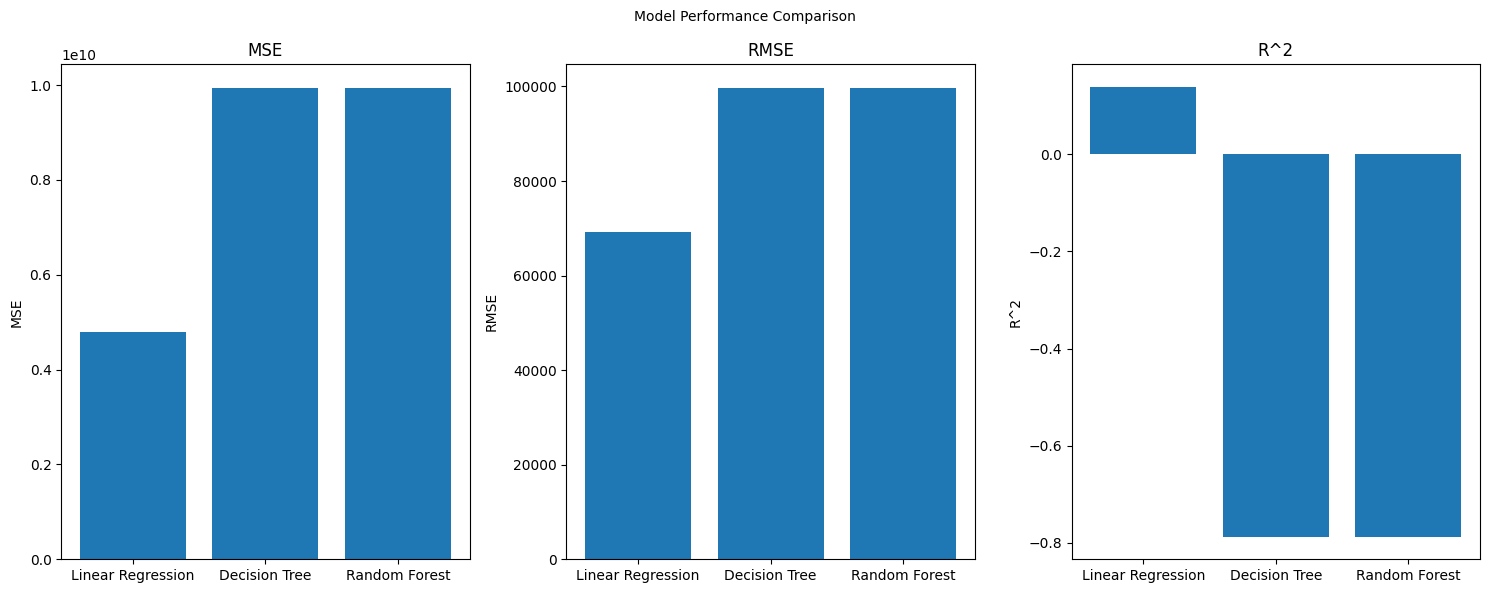

In [ ]:
# Evaluation data for each model
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_scores = [mse1, mse2, mse3]
rmse_scores = [rmse1, rmse2, rmse3]
r2_scores = [r2_1, r2_2, r2_3]

# Making subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Model Performance Comparison', fontsize=10)

# Plot MSE
axes[0].bar(model_names, mse_scores)
axes[0].set_title('MSE')
axes[0].set_ylabel('MSE')

# Plot RMSE
axes[1].bar(model_names, rmse_scores)
axes[1].set_title('RMSE')
axes[1].set_ylabel('RMSE')

# Plot R^2
axes[2].bar(model_names, r2_scores)
axes[2].set_title('R^2')
axes[2].set_ylabel('R^2')


plt.tight_layout()
plt.show()

**Conclusion:**
- Linear Regression performs the best in terms of both MSE and RMSE values, as it has the lowest error.
- R² Score for Linear Regression is also the only positive score, indicating that it explains a small proportion of the variance in the target variable better than the other two models.
- Decision Tree performs the worst, with the highest MSE and RMSE, and a negative R² score indicating poor model fit.
- Random Forest falls in the middle but still has a negative R² score, meaning it's not performing better than a baseline model.

**Best model: Linear Regression.**

In [ ]:
comparison_df_LR = pd.DataFrame({'id': df_test['id'], 'price': y_test_pred})
comparison_df_LR[['id', 'price']].to_csv('submission.csv', index=False)

comparison_df_LR

,id,price
0,188533,22472.035742
1,188534,71963.439964
2,188535,58384.082202
3,188536,13102.981734
4,188537,31008.395808
...,...,...
125685,314218,32505.283121
125686,314219,54539.603441
125687,314220,21801.721549
125688,314221,12686.800789


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# kalau mau simpan
comparison_df_LR.to_csv(f"submissionML.csv", index=False)

print("Submission sample:")
print(comparison_df_LR.head())

Submission sample:
       id         price
0  188533  22472.035742
1  188534  71963.439964
2  188535  58384.082202
3  188536  13102.981734
4  188537  31008.395808
